# Análise de vendas de gadgets EDA



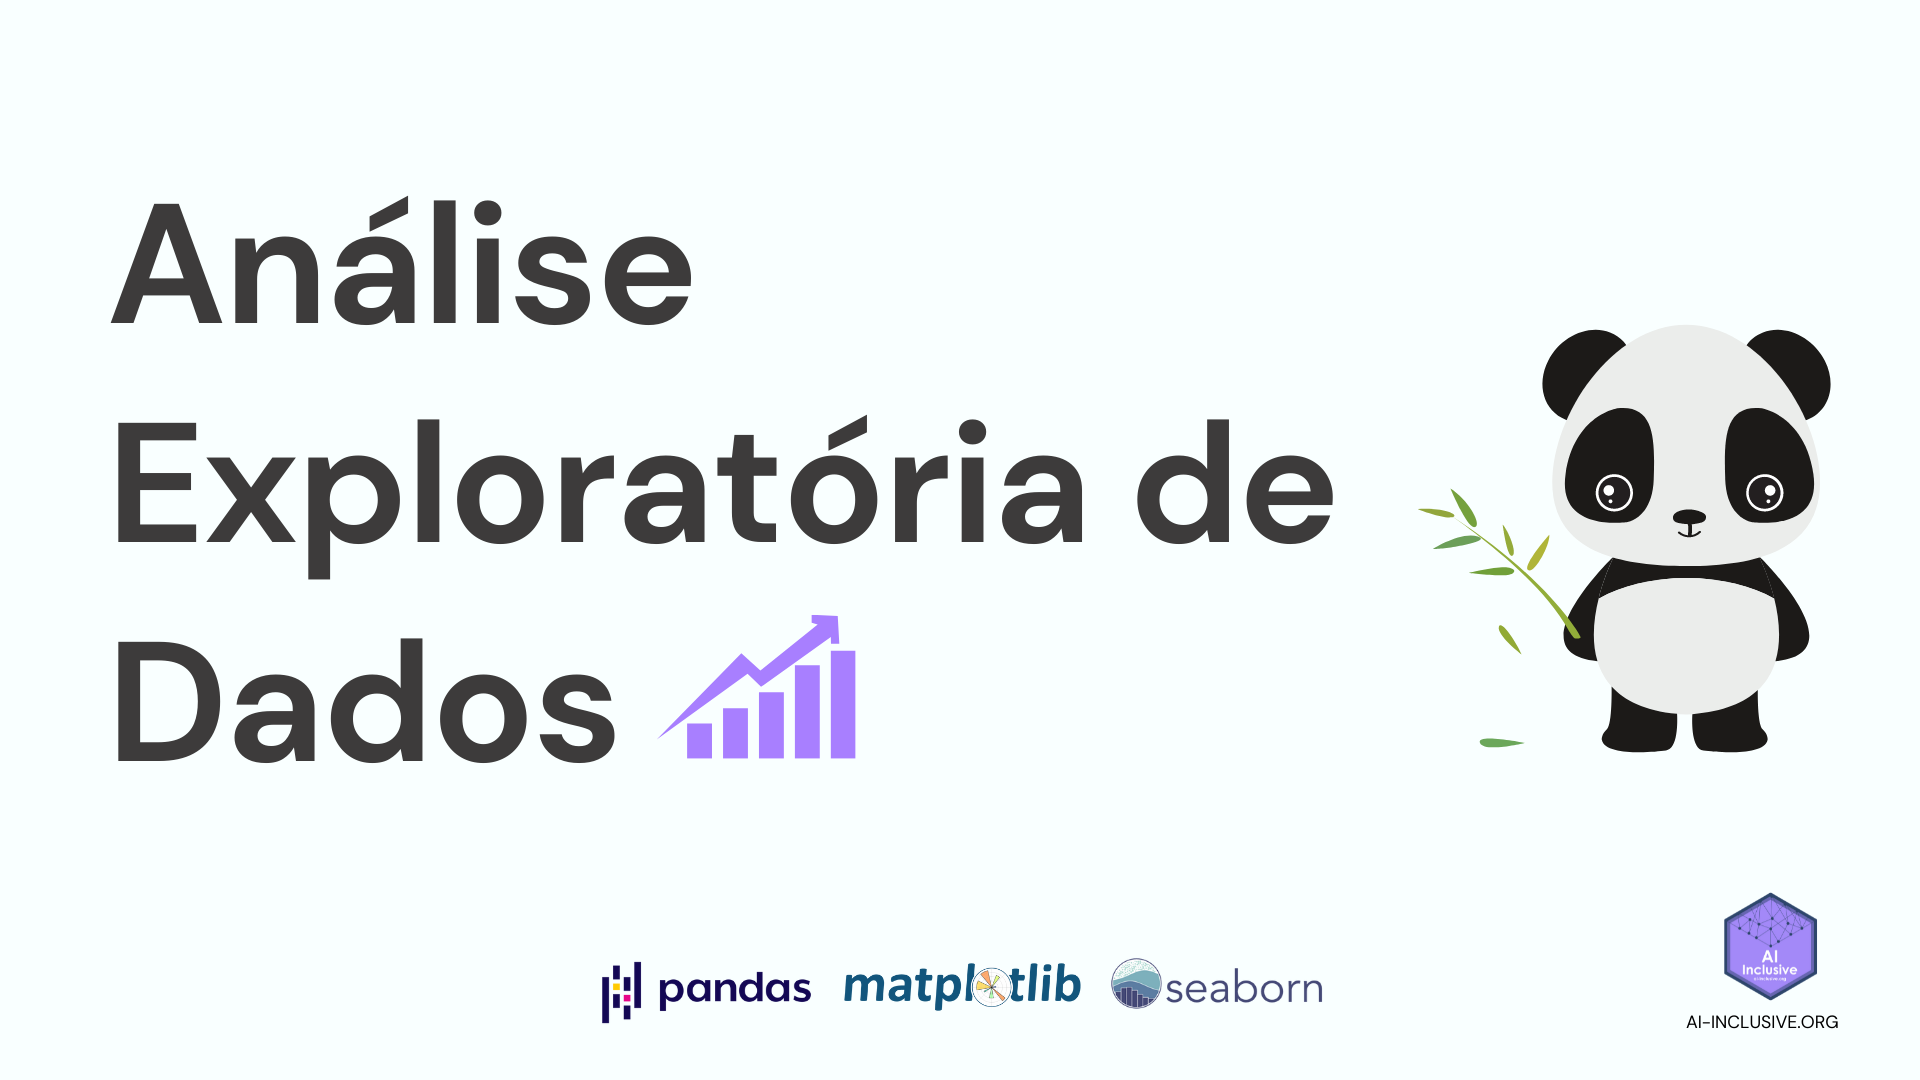

## Contexto: O que é análise de vendas?

Análise de vendas é a prática de gerar insights de dados de vendas, tendências e métricas para definir metas e prever o desempenho de vendas futuro. A prática recomendada para análise de vendas é vincular estreitamente todas as atividades para determinar os resultados da receita e definir objetivos para sua equipe de vendas.

A análise deve se concentrar na melhoria e no desenvolvimento de uma estratégia para melhorar o desempenho de vendas a curto e longo prazo. Um exemplo comum de atividade de análise de vendas é definir objetivos específicos de função para sua equipe na forma de KPIs (*Key Performance Indicator*) ou métricas. Por exemplo, definir uma meta de receita para seu diretor de vendas e, ao mesmo tempo, definir uma meta de produtividade de vendas para sua equipe de gerenciamento de contas.

## Por que monitorar a análise de vendas?

Se o seu negócio fosse uma banda de rock, as vendas seriam o vocalista. Todos os olhos estão voltados para o desempenho de vendas e receita, e um desempenho forte (ou fraco) pode se tornar uma força de mobilização potente para toda a equipe.

O monitoramento da análise de vendas na forma de métricas de vendas ajuda a aumentar seu desempenho, otimizar as atividades de vendas e melhorar a responsabilidade. Sua equipe de vendas tem uma ampla gama de atividades para se concentrar e operar em um ambiente de ritmo acelerado. Uma estratégia de análise de vendas bem definida fornece à sua equipe foco e clareza para que eles possam se concentrar em fazer o que fazem melhor.


## O que é a EDA

A EDA ou análise exploratória de dados é uma etapa importante do aprendizado de máquina que envolve aprender sobre os dados sem gastar muito tempo ou se perder nisso. Nesse processo você se familiariza com a estrutura e as características gerais do conjunto de dados, com os recursos independentes e dependentes e suas interações. Você também terá uma ideia dos processos de limpeza de dados a serem empregados e das possíveis técnicas de modelagem.

## Descrição dos dados e declaração do problema:

Nosso dataset é uma base dados histórica de vendas diárias de diferentes dispositivos móveis e de computadores, mês a mês, durante o período do ano de 2019.

Os atributos são:

* ID do pedido; 
* Produto;
* Quantidade pedida;
* Preço de cada produto;
* Data do pedido;
*Endereço de compra

Iremos pré-processar e explorar os dados, em seguida, encontrar algumas respostas para as perguntas: 

1. Qual mês tem as vendas mais altas?
2. Qual cidade tem pedidos máximos?
3. A que horas devemos exibir anúncios para maximizar a compra do produto?
4. Qual produto vendeu mais? E Por quê?
5. Quais produtos são vendidos principalmente juntos?

O objetivo deste processo é dar mais informações sobre os nossos dados para que a equipa de marketing se prepare para intensificar a eficiência a partir dos dados e informações que iremos disponibilizar!


Você pode acompanhar baixando o conjunto de dados [aqui](https://raw.githubusercontent.com/willclopes/Portfolio-Datasets/main/sales_data_gadget_2019.csv).

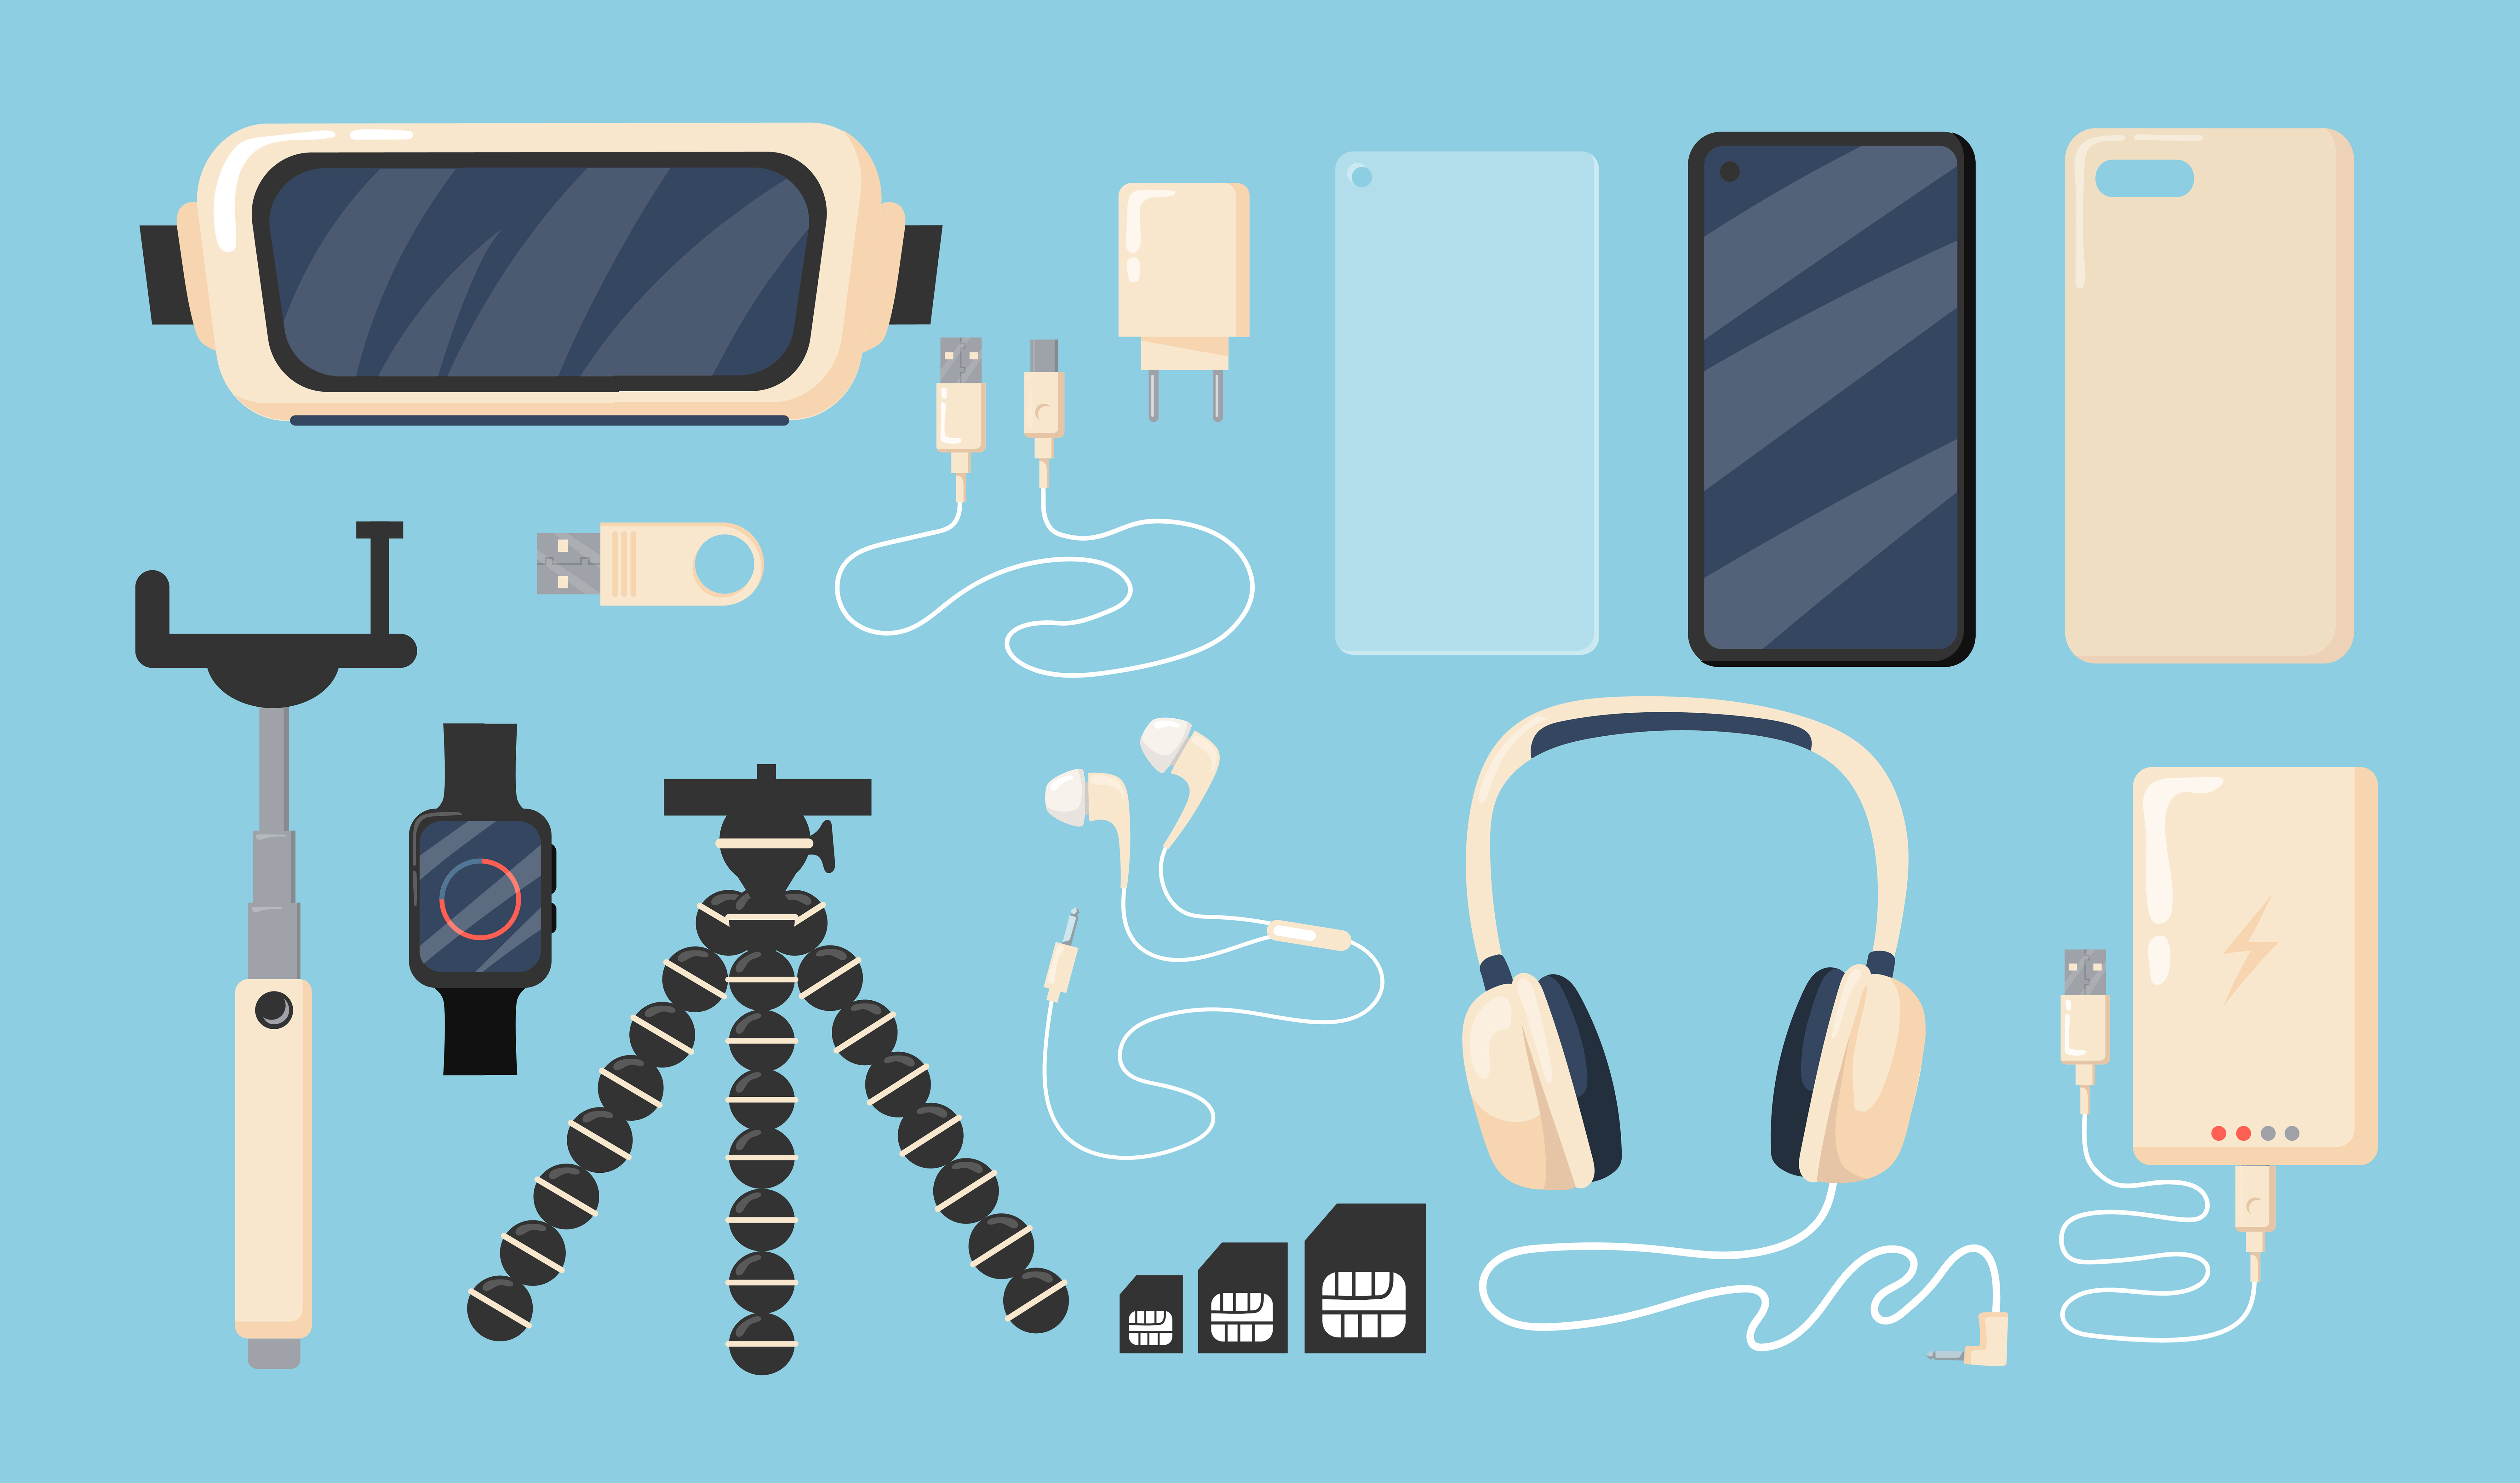

## Importar as Bibliotecas e o DataSet

A primeira etapa é importar as bibliotecas que usaremos em todo o projeto EDA. Em seguida, lemos o **train.csv** que baixei e salvei no meu github. Vamos a EDA no conjunto de **treino** porque ele contém a variável de destino e estamos interessados ​​em compreender os recursos individuais, bem como sua relação com o atributo de destino.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [35]:
 all_data = pd.read_csv("https://raw.githubusercontent.com/willclopes/Portfolio-Datasets/main/sales_data_gadget_2019.csv")

In [36]:
all_data.shape

(186850, 6)

In [37]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## Exploração de conjunto de dados básicos

### 1. Forma (dimensões) do DataFrame

Um DataFrame tem linhas e colunas, e o atributo **.shape** do Pandas retorna uma tupla de comprimento 2, cada valor mostrando o comprimento de cada dimensão ou (linhas, colunas). 

Podemos ver que o conjunto de dados possui 186.850 linhas e 6 colunas. 

### 2. Tipos de dados das várias colunas

Logo após, exibiremos todos os tipos de dados das colunas. Isso nos ajuda a entender o tipo de dados com os quais estamos lidando, em termos de distribuições numéricas e categóricas. Isso também lançará luz sobre alguns dos gráficos e plotagens exploratórias a serem usados.

Vamos dar uma olha nas 5 primeiras linhas do nosso dataset

In [38]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Agora, vamos ver a quantidade de produtos nulos ou "faltantes"

In [39]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Como existem muito poucos valores nulos em comparação com nosso conjunto de dados, podemos remover esses valores nulos.

In [40]:
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

Como fizemos com o pré-processamento, vamos dar um passo à frente para descobrir qual mês tem as vendas mais altas. 

Podemos ver que os tipos de dados não estão consistentes, como por exemplo, o atributo "Order Data" não está no formato de Data, e sim de "**Object**" e não temos uma coluna de mês, por isso, vamos **mudar o tipo de dados** e também **criar uma coluna de mês** e logo após vamos **convertê-lo para o tipo inteiro**, para que possamos realizar pesquisas especificas.

Vamos criar uma função para separar o mês do restante da data.


In [41]:
#declarando a função
def month(x):
    return x.split('/')[0]

all_data['Month']=all_data['Order Date'].apply(month)
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [42]:
all_data.query("Month == 'Order Date'")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


Pŕoximo passo é converter a coluna **"Month"** para inteiro, porém, como podemos ver na célula acima, 355 dados foram registrados como "Order Date" em vez da data, então, vamos arrumar isso acessando apenas os dados que contêm os meses corretos. 

In [43]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter])

185950

In [44]:
all_data=all_data[~filter]
all_data['Month']=all_data['Month'].astype(int)
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

Agora sim! 

Vamos aproveitar e converter as outras colunas para seus respectivos formatos.

In [45]:
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

Vamos criar uma nova coluna de **"Vendas** (Sales), que é o resultado do produto de **"Quantity Ordered"** com **"Price Each"**, com isso teremos o valor total do pedido de cada linha.

In [46]:

all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Finalmente, vamos saber agora **quais meses tiveram as vendas mais altas?**

In [47]:
all_data.groupby('Month')['sales'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

Vamos representar os dados de venda de forma gráfica para uma conclusão clara sobre as vendas mais altas.

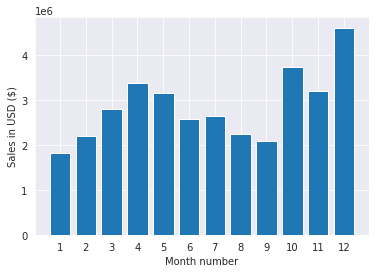

In [48]:
months=range(1,13)
plt.bar(months,all_data.groupby('Month')['sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

Observação: Podemos constatar que o **mês de dezembro** é o que apresenta as **maiores vendas** em relação aos demais.

### **Vamos descobrir qual cidade está colocando os pedidos mais altos.**

In [49]:
def city(x):
    return x.split(',')[1]
all_data['city']=all_data['Purchase Address'].apply(city)
all_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

Mais uma vez **traçando um gráfico de barras** para uma visualização mais clara

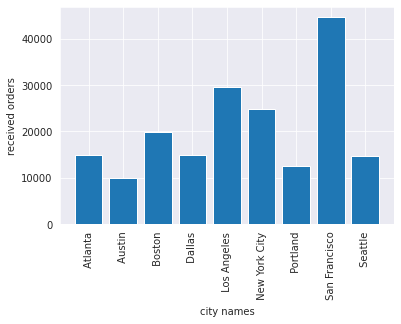

In [50]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

Observação: Podemos constatar que **São Francisco** obteve o **maior número de pedidos.**

### **Vamos descobrir a que horas devemos exibir anúncios para maximizar as compras de produtos?**

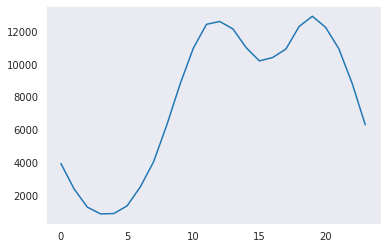

In [52]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))
plt.grid()
plt.plot(keys,hour)

Observação: Podemos concluir que o **horário entre 12h e 19h** é provavelmente o **melhor horário para anunciar** a fim de maximizar a compra do produto.


### **Seguindo em frente, vamos descobrir qual produto foi mais vendido e por quê?**

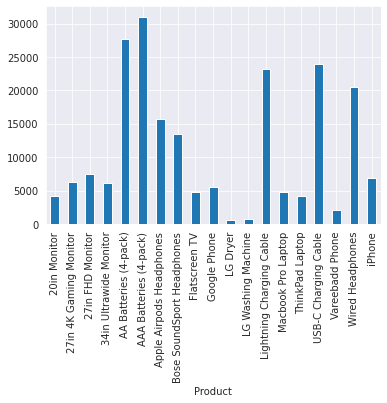

In [54]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar');

Observação: Podemos verificar que as pilhas AAA (4 unidades) são os produtos mais vendidos.


In [55]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

Agora vamos comparar o preço ao produto para descobrir por que o produto tem maior venda.

In [56]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

<Figure size 2880x1728 with 0 Axes>

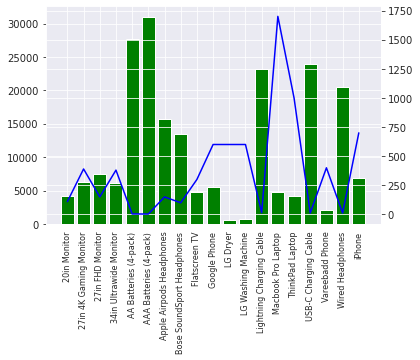

In [58]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()

Observação: Podemos constatar que o produto mais vendido são as **'Pilhas AAA'.** Os produtos **mais vendidos** parecem ter uma **correlação com o preço** do produto. Quanto mais barato o produto, maior a quantidade solicitada e vice-versa.


### **Seguindo em frente, vamos descobrir quais produtos são mais frequentemente vendidos juntos?**

Vamos agrupar os dados com base no ID do pedido e no produto, porque os produtos comprados juntos terão o mesmo ID do pedido,

In [60]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11


In [61]:
#create grouped col 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


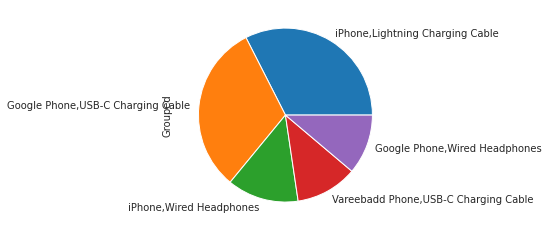

In [62]:
#vamos eliminar todos os IDs de pedido duplicados
df2 = df.drop_duplicates(subset=['Order ID'])

# plotando um diagrama de pizza 
df2['Grouped'].value_counts()[0:5].plot.pie()

A partir do diagrama de pizza acima, podemos chegar a uma conclusão de que o **iPhone e o carregador** são vendidos principalmente juntos.

Chegamos ao fim de nossa análise. Obrigado.

## Referências

* https://pandas.pydata.org/
* https://seaborn.pydata.org/
* https://towardsdatascience.com/
* https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists
* https://medium.com
* https://pagadala-saiteja.medium.com/